# Mattermost Lunch Channel History

- Data Source: [Mattermost API](https://api.mattermost.com/), [CCTB instance](https://cctb-intern.biologie.uni-wuerzburg.de/)
- Tasks:
	- Part I - June 2024: retrieving chat history data through the mattermost API
	- Part II - September 2024: analyzing messages in the lunch channel
- Language: [python](https://www.python.org/)

## Potential questions

- At what times is usually posted in the lunch channel
- Extract "the main lunch message" (MLM)
- How many reactions does MLM retrieve
    - Is there a correlation by day of week
    - Is there a trend over time
- Who posts MLM most often?
- Who attends most often without posting MLM?
- For an individal user get the attendance over time
- …

In [4]:
import numpy as np

In [5]:
np.random.seed(42)
" → ".join(np.random.permutation("Dominik Magdalena Felix Joel Robin".split()))

'Magdalena → Robin → Felix → Dominik → Joel'

## 1. Data loading

Load files:
- `messages.csv`
- `reactions.csv`
- `files.csv`

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

table = pd.read_csv('messages.csv')
sns.displot(table.create_at)

6934


In [20]:
table

,post_id,create_at,message,username,num_reactions,num_files
0,h957oi1t63rf5b6p4pqfhiis5h,2016-05-02 12:02:13.000,Also ich habe etwas dabei,greatfireball,0,0
1,rpwuii8hci8ezmn3d41u9d58fc,2016-05-02 12:03:02.000,ich gehe mir jetzt was holen,nterhoeven,0,0
2,e8bnwq8c7fdf5k7zpqyeihougr,2016-05-02 12:03:24.000,Alles klar,greatfireball,0,0
3,sku34dhpntdfdmc5d9ky9a9yso,2016-05-02 12:20:33.000,Hallo @joerg,greatfireball,0,0
4,hi38ssjpb3yqz88dk83tzjq5zr,2016-05-02 12:20:35.000,Essen?,greatfireball,0,0
...,...,...,...,...,...,...
6929,bztf3jo6q3rqbkpmabmbonhfde,2024-08-29 11:05:25.020,when?,felixfink,0,0
6930,pzcs4g7f3pgi7g35d6f4hwnp7w,2024-08-29 11:06:41.125,11:15?,sascha_ollertz,2,0
6931,d3dxbcsmyi8i7rae83hn6m6aue,2024-08-30 11:09:52.213,lunch 11:15?,felixfink,2,0
6932,gnamzgc7gprzzch6kpio9emwjy,2024-09-02 11:01:02.743,11:15?,felixfink,5,1


In [12]:
table.dtypes
time = pd.to_datetime(table.create_at)
time

0      2016-05-02 12:02:13.000
1      2016-05-02 12:03:02.000
2      2016-05-02 12:03:24.000
3      2016-05-02 12:20:33.000
4      2016-05-02 12:20:35.000
                 ...          
6929   2024-08-29 11:05:25.020
6930   2024-08-29 11:06:41.125
6931   2024-08-30 11:09:52.213
6932   2024-09-02 11:01:02.743
6933   2024-09-03 11:00:22.944
Name: create_at, Length: 6934, dtype: datetime64[ns]

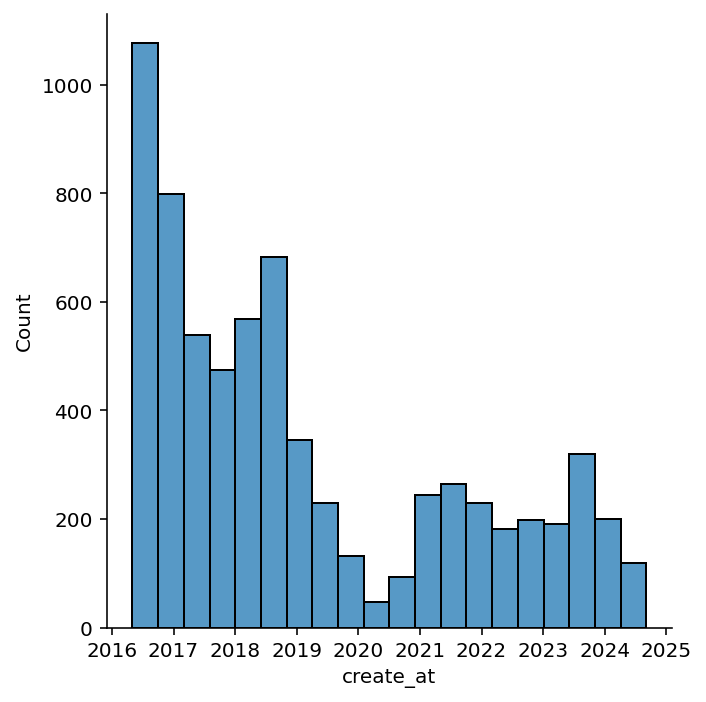

In [14]:
sns.displot(data=time)

In [24]:
table.query("create_at>='2024-07'")

,post_id,create_at,message,username,num_reactions,num_files
6880,ywkwbkbbp3rx8prdk6gzqnm9ih,2024-07-01 10:13:45.680,11:15? :eyes:,marko_korb,3,0
6881,wmgxbhn6p3de7mb7btkhp845xw,2024-07-02 10:57:56.224,11:15?,robin,0,1
6882,d4kx9urq83geu89s9aq6uuyupr,2024-07-05 11:04:10.014,11:15?,robin,2,1
6883,6fj37shripnhtkxgf3r4bqb5my,2024-07-08 10:13:47.192,11:15? :eyes:,marko_korb,2,0
6884,9ky97nqcptnopf5b6ctmcxj4wr,2024-07-12 11:29:11.707,Now? 👀,marko_korb,0,0
6885,6oeo59xiw7gmdb141qf4scc8fy,2024-07-15 10:57:40.233,11:15?,felixfink,4,1
6886,wdtwdze7offdjcxrmmejdksgxr,2024-07-15 15:32:38.168,15:45?,felixfink,2,1
6887,66er8cjy1j853dtdfywu319tge,2024-07-16 10:49:29.438,11:15?,felixfink,2,1
6888,j48cnpyk9bynp8nuaczdtz16dh,2024-07-17 12:11:01.277,Now,iimog,2,0
6889,y1k7i6upntnupj9xptre6kd1iy,2024-07-19 11:05:51.221,anyone here for lunch?,felixfink,0,0


In [19]:
table = table.assign(create_at=time)
df1 = table.groupby(table["create_at"].dt.to_period("M")).count()
print(df1)

           post_id  create_at  message  username  num_reactions  num_files
create_at                                                                 
2016-05        196        196      196       196            196        196
2016-06        145        145      145       145            145        145
2016-07        209        209      209       209            209        209
2016-08        282        282      282       282            282        282
2016-09        245        245      245       245            245        245
...            ...        ...      ...       ...            ...        ...
2024-05         16         16       16        16             16         16
2024-06         23         23       15        23             23         23
2024-07         24         24       22        24             24         24
2024-08         28         28       23        28             28         28
2024-09          2          2        2         2              2          2

[98 rows x 6 columns]


In [41]:
df2 = table['create_at'].dt.year
df2

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
6929    2024
6930    2024
6931    2024
6932    2024
6933    2024
Name: create_at, Length: 6934, dtype: int32

KeyError: 'create_at'

In [39]:
df2.columns

AttributeError: 'Series' object has no attribute 'columns'

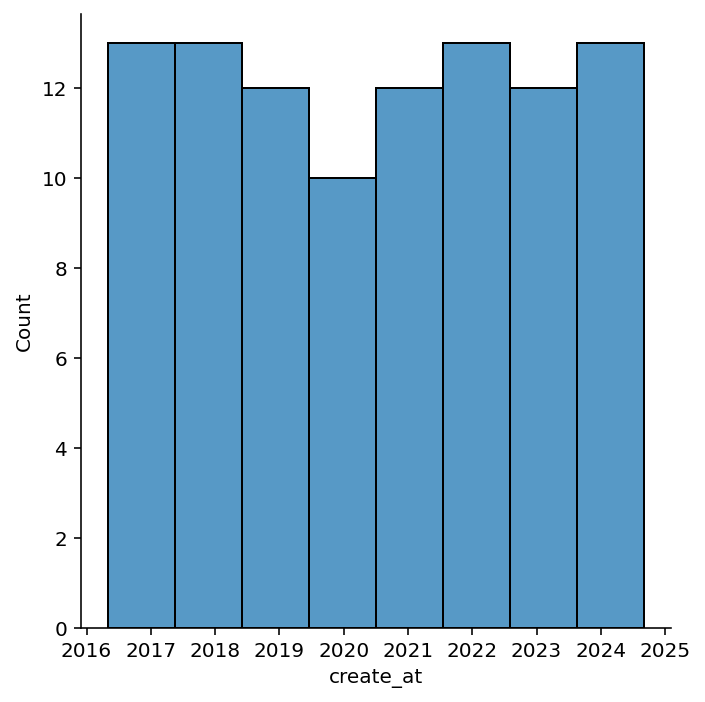

In [55]:
df1 = df1.assign(create_at = df1.index.to_timestamp())

sns.displot(data=df1, x = 'create_at')

In [43]:
df1.columns

Index(['post_id', 'create_at', 'message', 'username', 'num_reactions',
       'num_files'],
      dtype='object')